In [1]:
import matplotlib.pyplot as plt
from hsolver.collections import Spin, Oscillator, SpinFieldInteractionHamiltonian, MSGateHamiltonian
from hsolver.solver import SystemEvolutionSolver

Initialize spins and their common vibration mode

In [2]:
spin1 = Spin(frequency=1.)
spin2 = Spin(frequency=1.)
vibration = Oscillator(dim=10, frequency=1.)

Initialize hamiltonian in the spin-interaction picture

In [3]:
hamiltonian = MSGateHamiltonian(
    spin1=spin1,
    spin2=spin2,
    vibration=vibration,
    field_blue=SpinFieldInteractionHamiltonian.FieldParameters(
        frequency=0.9 * vibration.frequency, time_start=100., time_stop=800., pulse_front_width=10
    ),
    field_red=SpinFieldInteractionHamiltonian.FieldParameters(
        frequency=-0.9 * vibration.frequency, time_start=100., time_stop=800., pulse_front_width=10
    ),
    spin_field=SpinFieldInteractionHamiltonian.InteractionParameters(
        rabi_frequency=0.1,
        ld_param=0.1
    )
)

Initialize solver

In [4]:
solver = SystemEvolutionSolver(
    hamiltonian=hamiltonian,
    init_state=[spin1.basis_state(0), spin2.basis_state(0), vibration.basis_state(0)],
    max_step_size=1.,
    min_step_size=0.1
)

Solve in $t\in[0,1000]$ time interval

In [5]:
solver.solve(time_stop=1000.);

===> TIME INTERVAL 1/5
* t_start = 0.0000e+00, t_stop = 5.0000e+01
* Constant hamiltonian => use unitary product
* Repeat unitary: 100% (49 steps)
===> TIME INTERVAL 2/5
* t_start = 5.0000e+01, t_stop = 1.5000e+02
* Non periodic interval => use plain solving: 2% (15 steps)

/media/data/Python/HSolver/venv/lib/python3.8/site-packages/scipy-1.10.1-py3.8-linux-x86_64.egg/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


* Non periodic interval => use plain solving: 100% (1001 steps)
===> TIME INTERVAL 3/5
* t_start = 1.5000e+02, t_stop = 7.5000e+02
* Periodic hamiltonian (period: 6.9813e+00) => using Floquet method
* Solving for single period: 100% (70 steps)
* Repeat unitary: 100% (5946 steps)
===> TIME INTERVAL 4/5
* t_start = 7.5000e+02, t_stop = 8.5000e+02
* Non periodic interval => use plain solving: 100% (1000 steps)
===> TIME INTERVAL 5/5
* t_start = 8.5000e+02, t_stop = 1.0000e+03
* Constant hamiltonian => use unitary product
* Repeat unitary: 100% (149 steps)


Plot results

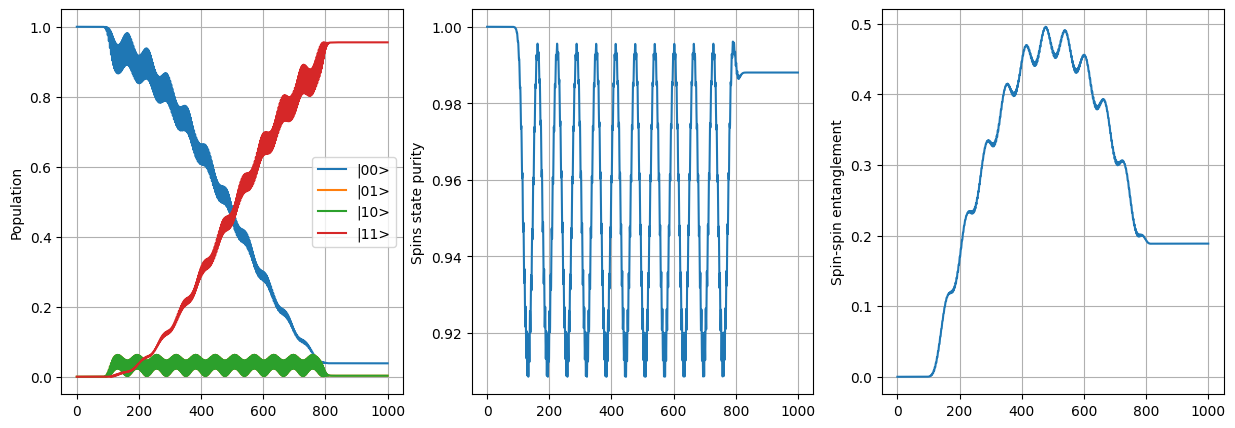

In [6]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

population = solver.get_populations_evolution([spin1, spin2])
labels = ["|00>", "|01>", "|10>", "|11>"]
for label, level_population in zip(labels, population):
    ax1.plot(solver.time_list, level_population, label=label)
ax1.grid()
ax1.legend()
ax1.set_ylabel("Population")

purity = solver.get_purity_evolution([spin1, spin2])
ax2.plot(solver.time_list, purity)
ax2.grid()
ax2.set_ylabel("Spins state purity")

negativity = solver.get_entanglement_evolution([spin1], [spin2])
ax3.plot(solver.time_list, negativity)
ax3.grid()
ax3.set_ylabel("Spin-spin entanglement")

plt.show()